In [5]:
import pandas as pd 
import numpy as np 
from pandas.io.json import json_normalize
import json 
from surprise import Dataset, Reader
from surprise import accuracy
from surprise.model_selection.split import train_test_split

In [6]:
df = pd.read_json('modcloth_final_data.json', lines = True)
df
#LOADING dataframe

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
0,34.0,36,new,d,small,5ft 6in,38.0,123373,just right,5.0,NaN,NaN,NaN,NaN,7,991571,Emily,29.0
1,36.0,NaN,new,b,small,5ft 2in,30.0,123373,just right,3.0,NaN,NaN,NaN,NaN,13,587883,sydneybraden2001,31.0
2,32.0,NaN,new,b,small,5ft 7in,NaN,123373,slightly long,2.0,NaN,NaN,9.0,NaN,7,395665,Ugggh,30.0
3,NaN,NaN,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,NaN,NaN,21,875643,alexmeyer626,NaN
4,36.0,NaN,new,b,small,5ft 2in,NaN,123373,slightly long,5.0,NaN,NaN,NaN,NaN,18,944840,dberrones1,NaN
5,36.0,NaN,new,c,small,5ft 4in,41.0,123373,just right,5.0,NaN,NaN,NaN,NaN,11,162012,Doreenajane,27.0
6,32.0,NaN,new,b,large,5ft 3in,NaN,123373,just right,1.0,NaN,NaN,NaN,NaN,5,114843,barbiejenks,26.0
7,38.0,NaN,new,d,small,5ft 5in,42.0,123373,just right,5.0,NaN,NaN,8.5,NaN,11,58869,brettloie,NaN
8,42.0,NaN,new,d,small,5ft 10in,50.0,123373,just right,4.0,NaN,NaN,11.0,wide,30,279568,francescaviola,NaN
9,36.0,39,new,dd/e,fit,5ft 6in,41.0,123373,just right,5.0,NaN,NaN,9.0,NaN,13,950172,laurenpolzin,NaN


In [7]:
Trialdf = df[['item_id','quality','user_name']]
Trialdf
#dataframe for what matters; ratings, quality, items

,item_id,quality,user_name
0,123373,5.0,Emily
1,123373,3.0,sydneybraden2001
2,123373,2.0,Ugggh
3,123373,5.0,alexmeyer626
4,123373,5.0,dberrones1
5,123373,5.0,Doreenajane
6,123373,1.0,barbiejenks
7,123373,5.0,brettloie
8,123373,4.0,francescaviola
9,123373,5.0,laurenpolzin


In [8]:
Trialdf.isnull().sum()

item_id       0
quality      68
user_name     0
dtype: int64

In [9]:
Trialdf = Trialdf[np.isfinite(Trialdf['quality'])]
Trialdf.isnull().sum()
#Removing the 68 NAN rows in quality

item_id      0
quality      0
user_name    0
dtype: int64

In [64]:
Unique_Users = Trialdf.user_name.unique()
Unique_Users
#Made List containing all individual users 
#Done

array(['Emily', 'sydneybraden2001', 'Ugggh', ..., 'beezy13', 'Maayan',
       'maireadsteadman'], dtype=object)

In [93]:
List_of_Users_And_NumOfPurchases = Trialdf.groupby('user_name').count().item_id
UserNumBought_List = np.array(List_of_Users_And_NumOfPurchases)
UserNumBought_List
#32,3999 unique user names, with the number of purchases for each user, everyone rated every item they purchased
#How much Each Person is Buying
#Done

array([1, 1, 1, ..., 5, 1, 1])

In [94]:
UserNumBought_List.mean()
#Average amount of Items bought by a person

2.5532269514491186

In [58]:
List_of_Items_And_NumOfUsers = Trialdf.groupby('item_id').count().user_name
ItemNumBought_List = np.array(List_of_Items_And_NumOfUsers)
ItemNumBought_List
#How much Each Item is being Bought
#Done

array([ 53,  14, 172, ...,  65,  24,  47])

In [95]:
ItemNumBought_List.mean()
#Average amount of times an item is bought

60.11773255813954

In [65]:
Unique_Items = Trialdf.item_id.unique()
Unique_Items
#List of all individual items
#Done

array([123373, 124024, 124124, ..., 807252, 807384, 807722])

In [68]:
print(Trialdf.loc[Trialdf['user_name'].isin(['ana'])])
#Looking at an individual's ('ana') purchases and ratings  

       item_id  quality user_name  List_of_Ratings
2918    136482      5.0       ana              5.0
29986   404557      4.0       ana              4.0
41785   454030      5.0       ana              5.0
44657   484879      4.0       ana              4.0
48145   519836      3.0       ana              3.0
77136   765620      3.0       ana              3.0


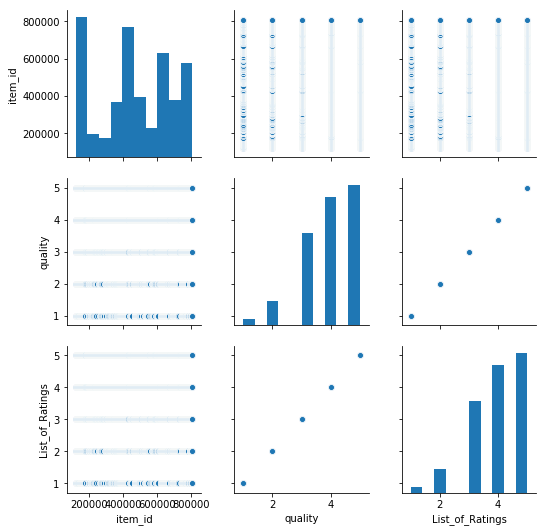

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
sns.pairplot(Trialdf)

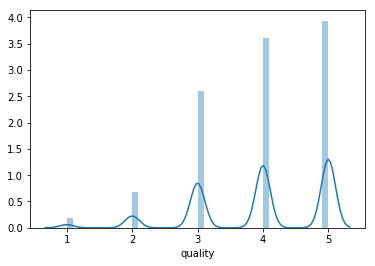

In [87]:
sns.distplot(Trialdf['quality'])
#Most customers seem to be happier with their purchases than being disappointed

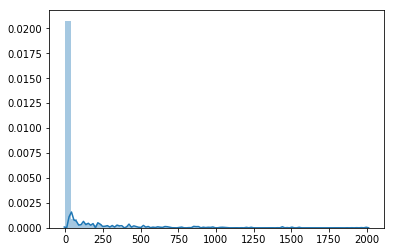

In [88]:
sns.distplot(ItemNumBought_List)
#Clearly shows how majority of items were bought less than 50 times

In [69]:
Trialdf.describe()

,item_id,quality,List_of_Ratings
count,82722.000000,82722.000000,82722.000000
mean,469317.322756,3.949058,3.949058
std,213996.309012,0.992783,0.992783
min,123373.000000,1.000000,1.000000
25%,314980.000000,3.000000,3.000000
50%,454030.000000,4.000000,4.000000
75%,658440.000000,5.000000,5.000000
max,807722.000000,5.000000,5.000000


In [70]:
#Read in values as Surprise dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(Trialdf[['user_name', 'item_id', 'quality']], reader)

In [71]:
trainset, testset = train_test_split(data,test_size=0.2)

In [81]:
#Trying to make List of all Users in the Test Set
testset 

[('Rachel', 806856, 5.0),
 ('andreajenels', 484879, 2.0),
 ('sophie.b.lebel', 175771, 5.0),
 ('Hannah', 417269, 5.0),
 ('cnasui12', 171740, 4.0),
 ('drashtahip3588', 722362, 4.0),
 ('sabrinazappa', 416942, 5.0),
 ('Kebayagirl', 165525, 3.0),
 ('lilpunkyy', 550103, 3.0),
 ('Heather', 126885, 4.0),
 ('Kelly', 400541, 5.0),
 ('Sarah', 412737, 3.0),
 ('bethlassiter76', 425631, 3.0),
 ('Annie', 604607, 4.0),
 ('aruggieri415', 726492, 3.0),
 ('Maddy', 712030, 3.0),
 ('Anne', 668696, 3.0),
 ('g.michelle.perez', 407134, 5.0),
 ('zinomura', 407574, 3.0),
 ('Brandi', 765620, 5.0),
 ('gmorton23', 659701, 5.0),
 ('Katy', 401773, 5.0),
 ('kmasick', 391519, 4.0),
 ('Lucy', 486643, 5.0),
 ('Jogita', 391519, 5.0),
 ('Elisa', 630114, 3.0),
 ('johnna_73', 637931, 5.0),
 ('Leanne', 539980, 5.0),
 ('lapierce50', 581432, 3.0),
 ('averysteele1', 175771, 4.0),
 ('Deb', 647235, 3.0),
 ('alisan.amrhein', 165525, 1.0),
 ('kraney0223', 152702, 5.0),
 ('AGG1', 269063, 5.0),
 ('meganlaurareimer', 407134, 4.0),
 ('

In [133]:
dataset = data.build_full_trainset()
print('Number of users: ',dataset.n_users,'\n')
print('Number of items: ',dataset.n_items)
#Finding out that there are 1,376 items, probably better to use item-item similarity for neighborhood-based methods

Number of users:  32399 

Number of items:  1376


In [134]:
32399*1376

44581024

In [135]:
82722/44581024 #Sparsity of our dataset

0.001855542842622906

In [136]:
# importing relevant libraries for modeling 
from surprise.prediction_algorithms import knns
from surprise.similarities import cosine, msd, pearson
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV

In [137]:
#Setting up two Metrics
sim_cos = {'name':'cosine','user_based':False}
sim_pearson = {'name':'pearson','user_based':False}

In [138]:
#Checking out Memory-Based Method (Neighborhood-Based)
# KNNBasic (using Cosine similarity as a metric)
basic = knns.KNNBasic(sim_options=sim_cos)
basic.fit(trainset)
predictions = basic.test(testset)
print(accuracy.rmse(predictions))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0351
1.0351479171269033


In [139]:
#KNNBasic (using Pearson similarity as a metric)
basic_pearson = knns.KNNBasic(sim_options=sim_pearson)
basic_pearson.fit(trainset)
predictions = basic_pearson.test(testset)
print(accuracy.rmse(predictions))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0530
1.0529607098068483


In [140]:
#KNNwithMeans (using Cosine similarity since it outperformed Pearson)
knn_means = knns.KNNWithMeans(sim_options=sim_cos)
knn_means.fit(trainset)
predictions = knn_means.test(testset)
print(accuracy.rmse(predictions))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0017
1.0016579061851512


In [141]:
#KNNBaseline (Cosine again, KNNBaseline includes bias term)
knn_baseline = knns.KNNBaseline(sim_options=sim_cos)
knn_baseline.fit(trainset)
predictions = knn_baseline.test(testset)
print(accuracy.rmse(predictions))
#Best Memory-Based Model run

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9906
0.9905602538575518


In [122]:
#GridSearch on SVD to try out different parameters to find optimal ones
param_grid = {'n_factors':[20,50],'n_epochs': [5, 10], 'lr_all': [0.002, 0.005], 'reg_all': [0.4, 0.6]}
gs_model = GridSearchCV(SVD,param_grid=param_grid,n_jobs = -1,joblib_verbose=5)
gs_model.fit(data)
gs_model.best_params

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


KeyboardInterrupt: 

In [85]:
gs_model.best_score

{'rmse': 0.9516386898822737, 'mae': 0.7705738445980524}

In [86]:
#GridSearch on SVD with different n_factors and reg_all
param_grid = {'n_factors':[20,30],'n_epochs': [5, 10], 'lr_all': [0.002, 0.005], 'reg_all': [0.2, 0.6]}
gs_modelA = GridSearchCV(SVD,param_grid=param_grid,n_jobs = -1,joblib_verbose=5)
gs_modelA.fit(data)
gs_modelA.best_params
#Looks like 10 n_factors with 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done  74 out of  80 | elapsed:  1.5min remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.6min finished


{'rmse': {'n_factors': 20, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.2},
 'mae': {'n_factors': 20, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.6}}

In [87]:
gs_modelA.best_score

{'rmse': 0.9496501207952793, 'mae': 0.7704374909534012}

In [88]:
#GridSearch on SVD with different n_factors and reg_all
param_grid = {'n_factors':[10,20],'n_epochs': [5, 10], 'lr_all': [0.002, 0.005], 'reg_all': [0.2,0.4]}
gs_modelB = GridSearchCV(SVD,param_grid=param_grid,n_jobs = -1,joblib_verbose=5)
gs_modelB.fit(data)
gs_modelB.best_params
#Seems reg_all 0.2 is best while n_factors favoring lower values such as 5; does seem to have worse RMSE than previous

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done  74 out of  80 | elapsed:  1.5min remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.6min finished


{'rmse': {'n_factors': 10, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.2},
 'mae': {'n_factors': 10, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}}

In [89]:
gs_modelB.best_score

{'rmse': 0.949614362152744, 'mae': 0.7707649004789687}

In [142]:
#SVD Model-Based Collaborative Filtering approach, with First GridSearch Optimal parameters 
svd = SVD(n_factors=20,n_epochs=10,lr_all=0.005,reg_all=0.4)
svd.fit(trainset)
predictions = svd.test(testset)
print(accuracy.rmse(predictions))

RMSE: 0.9598
0.9597748287818351


In [143]:
#SVD 3rd GridSearch Opt parameters
#decreasing n_factors to 10 and keeping reg_all at 0.2
svd = SVD(n_factors=10,n_epochs=10,lr_all=0.005,reg_all=0.2)
svd.fit(trainset)
predictions = svd.test(testset)
print(accuracy.rmse(predictions))

RMSE: 0.9582
0.9581739172584685


In [144]:
#SVD 2nd GridSearch Opt parameters
#just decreasing reg_all to 0.2
svd = SVD(n_factors=20,n_epochs=10,lr_all=0.005,reg_all=0.2)
svd.fit(trainset)
predictions = svd.test(testset)
print(accuracy.rmse(predictions))
#WINS with best parameters for our SVD model's performance

RMSE: 0.9581
0.9581301684253712


In [157]:
predictions

[Prediction(uid='furnclaws', iid=766618, r_ui=5.0, est=4.140721062232487, details={'was_impossible': False}),
 Prediction(uid='mippy98', iid=486643, r_ui=5.0, est=3.685952797324401, details={'was_impossible': False}),
 Prediction(uid='kayladesirae', iid=161592, r_ui=5.0, est=4.000364923417458, details={'was_impossible': False}),
 Prediction(uid='bizzerickson', iid=380801, r_ui=3.0, est=4.033371396385716, details={'was_impossible': False}),
 Prediction(uid='jnelson2386', iid=406357, r_ui=4.0, est=4.029533622249052, details={'was_impossible': False}),
 Prediction(uid='Laura', iid=298256, r_ui=5.0, est=3.951181961046857, details={'was_impossible': False}),
 Prediction(uid='Roxy', iid=659701, r_ui=5.0, est=4.496986323554833, details={'was_impossible': False}),
 Prediction(uid='Amber', iid=787518, r_ui=5.0, est=4.1359006541742165, details={'was_impossible': False}),
 Prediction(uid='clairecat98', iid=668800, r_ui=3.0, est=4.013094956713942, details={'was_impossible': False}),
 Prediction(ui

In [170]:
user_34_prediction = svd.predict('ana',715501)
user_34_prediction
#Checking out a random prediction for 'ana'

Prediction(uid='ana', iid=715501, r_ui=None, est=3.6655835543720725, details={'was_impossible': False})

In [167]:
user_70_prediction = svd.predict('ana',374614)
user_70_prediction
#Seems 'ana' may prefer item 374614 slightly more than item 715501

Prediction(uid='ana', iid=374614, r_ui=None, est=4.086141677702061, details={'was_impossible': False})